In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Perceptron(nn.Module):

    def __init__(self, input_dim, output_dim):
       
        super(Perceptron, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        
        print("Hello I'm the forward function")
        y = self.fc1(x_in)
        
        return y


In [3]:
p1 = Perceptron(3,1)

In [4]:
p1

Perceptron(
  (fc1): Linear(in_features=3, out_features=1, bias=True)
)

In [5]:
p1.fc1

Linear(in_features=3, out_features=1, bias=True)

In [6]:
p1.fc1.weight

Parameter containing:
tensor([[0.4445, 0.1450, 0.1727]], requires_grad=True)

In [7]:
p2 = Perceptron(3,1)
p2.fc1.weight

Parameter containing:
tensor([[ 0.0498,  0.1353, -0.4538]], requires_grad=True)

In [8]:
x_1 = torch.tensor([1.0,0.0,0.0])

In [9]:
x_1

tensor([1., 0., 0.])

In [10]:
p2(x_1)

Hello I'm the forward function


tensor([-0.2888], grad_fn=<ViewBackward0>)

In [11]:
p2.fc1.bias

Parameter containing:
tensor([-0.3386], requires_grad=True)

In [12]:
torch.sigmoid(x_1)

tensor([0.7311, 0.5000, 0.5000])

In [13]:
class LogReg(nn.Module):

    def __init__(self, input_dim, output_dim):
       
        super(LogReg, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        
        print("Hello I'm the forward function")
        y = self.fc1(x_in)
        y = torch.sigmoid(y)
        
        return y


In [14]:
lr1 = LogReg(3,1)

In [15]:
lr1.fc1.weight

Parameter containing:
tensor([[ 0.0984, -0.0107, -0.5585]], requires_grad=True)

In [16]:
lr1.fc1.bias

Parameter containing:
tensor([-0.4473], requires_grad=True)

In [17]:
x_1

tensor([1., 0., 0.])

In [18]:
lr1(x_1)

Hello I'm the forward function


tensor([0.4137], grad_fn=<SigmoidBackward0>)

In [19]:
x_2 = torch.tensor([-10000.0,-15.7,-8.9])

In [20]:
lr1(x_2)

Hello I'm the forward function


tensor([0.], grad_fn=<SigmoidBackward0>)

# Punktewolken bauen

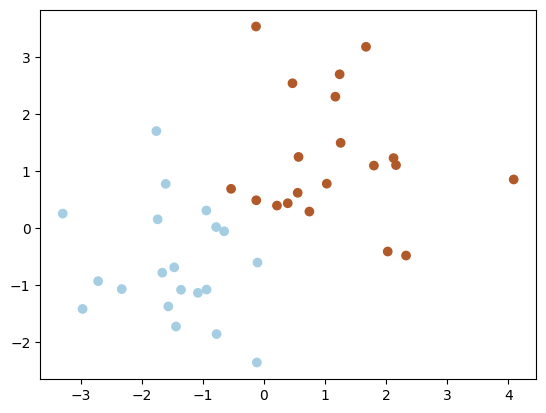

In [21]:
c11 = -1 
c12 = -1
c21 = 1 
c22 = 1

s1 = np.random.randn(20, 2) + [c11, c12]
s2 = np.random.randn(20, 2) + [c21, c22]

X = np.r_[s1,s2 ]
Y = [-1] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired)

# Ab hier passen die Variablennamen noch nicht

In [22]:
lr = 0.1
optimizer = optim.Adam(params=lr1.parameters(), lr=lr)
bce_loss = nn.BCEWithLogitsLoss()

NameError: name 'optim' is not defined

In [ ]:
epoch = 0  # reset epoch counter
n_epochs = 2
for epoch in range(n_epochs):  # the model will train for a fixed number of epochs

    # reset gradients
    optimizer.zero_grad()
        
    x_batch = torch.randn(2,3)
    
    # get model predictions
    y_pred = p(x_batch).squeeze()
        
    # compute loss
    y = torch.tensor([0.0,1.0])
    loss = bce_loss(y_pred, y)
    print("Loss",loss)
        
    # backpropagate loss & compute the gradients
    loss.backward()
    
    print("Before step",p.fc1.weight)
        
    # update the weights using the optimizer
    optimizer.step()
    
    print("After step",p.fc1.weight)